In [84]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [85]:
base_path="/net/mraid08/export/jafar/UKBioBank/Data/"
data_path=os.path.join(base_path,"ukb29741.csv")
train_val_path=os.path.join(os.path.join(base_path,"ukb29741_a1c_below_65_updates_scoreboard_train_val.csv"))
test_path=os.path.join(os.path.join(base_path,"ukb29741_a1c_below_65_updates_scoreboard_test.csv"))

In [46]:
ls -lht /net/mraid08/export/jafar/UKBioBank/Data/

Holla! que tal?
total 173G
-rw-rw-r--+ 1 edlitzy segalg     53M Dec 21 18:57 ukb29741_a1c_below_65_updates_scoreboard_test.csv
-rw-rw-r--+ 1 edlitzy segalg    209M Dec 21 18:57 ukb29741_a1c_below_65_updates_scoreboard_train_val.csv
-rw-rw-r--+ 1 edlitzy segalg     65M Dec 21 18:56 ukb29741_a1c_below_65_updates_scoreboard_val.csv
-rw-rw-r--+ 1 edlitzy segalg    150M Dec 21 18:56 ukb29741_a1c_below_65_updates_scoreboard_train.csv
-rw-rw-r--+ 1 edlitzy segalg    146M Dec 19 18:05 ukb29741_a1c_below_65_updates_scoreboard_trainw_diab_medicine.csv
-rw-rw-r--+ 1 edlitzy segalg     52M Dec 16 12:47 bu_ukb29741_a1c_below_65_updates_scoreboard_test.csv
-rw-rw-r--+ 1 edlitzy segalg     62M Dec 16 12:46 bu_ukb29741_a1c_below_65_updates_scoreboard_val.csv
-rw-rw-r--+ 1 edlitzy segalg    144M Dec 16 12:46 bu_ukb29741_a1c_below_65_updates_scoreboard_train.csv
-rw-rw-r--+ 1 edlitzy segalg    205M Dec 16 12:45 bu_ukb29741_a1c_below_65_updates_scoreboard_train_val.csv
-rw-rw-r--+ 1 edlitzy segalg     49

In [7]:
data_cols=pd.read_csv(data_path,nrows=0).columns

In [11]:
date_cols=[x for x in data_cols if x.startswith("53-")]

In [38]:
socio_cols=[x for x in data_cols if x.startswith("189-")]

In [39]:
socio_cols

['189-0.0']

In [13]:
diab_date_cols=[x for x in data_cols if x.startswith("2976-")]

In [14]:
diab_stat_cols=[x for x in data_cols if x.startswith("2443-")]

In [40]:
tot_cols=socio_cols+date_cols+diab_date_cols+diab_stat_cols+["eid"]

In [41]:
tot_cols

['189-0.0',
 '53-0.0',
 '53-1.0',
 '53-2.0',
 '2976-0.0',
 '2976-1.0',
 '2976-2.0',
 '2443-0.0',
 '2443-1.0',
 '2443-2.0',
 'eid']

In [53]:
df=pd.read_csv(data_path,usecols=tot_cols,index_col="eid")

/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (30,31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [60]:
test_data=pd.read_csv(test_path,usecols=["eid","2443-3.0"],index_col="eid")
train_val_data=pd.read_csv(train_val_path,usecols=["eid","2443-3.0"],index_col="eid")

In [61]:
tot_data=pd.concat([test_data,train_val_data])
tot_data.shape

(44709, 1)

In [43]:
df.loc[:,['53-0.0','53-1.0','53-2.0','2976-0.0','2976-1.0','2976-2.0',]]=df.loc[
    :,['53-0.0','53-1.0','53-2.0','2976-0.0','2976-1.0','2976-2.0',]].apply(pd.to_datetime,errors='coerce')

In [62]:
df.head()

,53-0.0,53-1.0,53-2.0,189-0.0,2443-0.0,2443-1.0,2443-2.0,2976-0.0,2976-1.0,2976-2.0
eid,,,,,,,,,,
4704502,2009-02-25,NaN,NaN,0.539501,0.0,NaN,NaN,NaN,NaN,NaN
4020781,2010-01-15,NaN,NaN,0.312445,0.0,NaN,NaN,NaN,NaN,NaN
5473158,2010-04-28,NaN,NaN,-3.045280,0.0,NaN,NaN,NaN,NaN,NaN
3379784,2008-04-25,NaN,NaN,-5.003570,0.0,NaN,NaN,NaN,NaN,NaN
2014430,2010-02-19,2013-03-02,2016-04-11,-3.496450,0.0,0.0,0.0,NaN,NaN,NaN


In [73]:
189-0.0tot_data=tot_data.join(df)

In [74]:
tot_data.notna().sum()

2443-3.0    44709
53-0.0      44709
53-1.0      18401
53-2.0      33086
189-0.0     44672
2443-0.0    44709
2443-1.0    18401
2443-2.0    33064
2976-0.0        0
2976-1.0      182
2976-2.0      657
dtype: int64

In [ ]:
#189-0.0, Townsend deprivation index at recruitment, 738-0.0 Average total household income before tax (Pilot)

# Socio columns:

In [65]:
from scipy.stats import mannwhitneyu as mwu

In [69]:
tot_data["2443-3.0"]

eid
1717325    0.0
5606913    0.0
3718362    0.0
4850869    0.0
4718570    0.0
          ... 
6025645    0.0
6025726    0.0
6026090    0.0
6026170    0.0
6026182    0.0
Name: 2443-3.0, Length: 44709, dtype: float64

In [72]:
tot_data.columns

Index(['2443-3.0'], dtype='object')

In [111]:
r,p=mwu(x=tot_data["189-0.0"].dropna().iloc[:1000],y=tot_data["2443-3.0"].dropna().iloc[:1000])

In [112]:
p

2.7685746354698984e-137

In [77]:
tot_data_sick=tot_data.loc[tot_data["2443-3.0"]==1,"189-0.0"]

In [78]:
tot_data_healthy=tot_data.loc[tot_data["2443-3.0"]==0,"189-0.0"]

In [ ]:
fig,ax=plt.subplot(1,1,figsize=(12,12))

In [82]:
tot_data_healthy.describe()

count    43867.000000
mean        -2.013324
std          2.659843
min         -6.258260
25%         -3.945320
50%         -2.705290
75%         -0.711557
max         10.587900
Name: 189-0.0, dtype: float64

In [86]:
bins = np.linspace(-10, 10, 100)

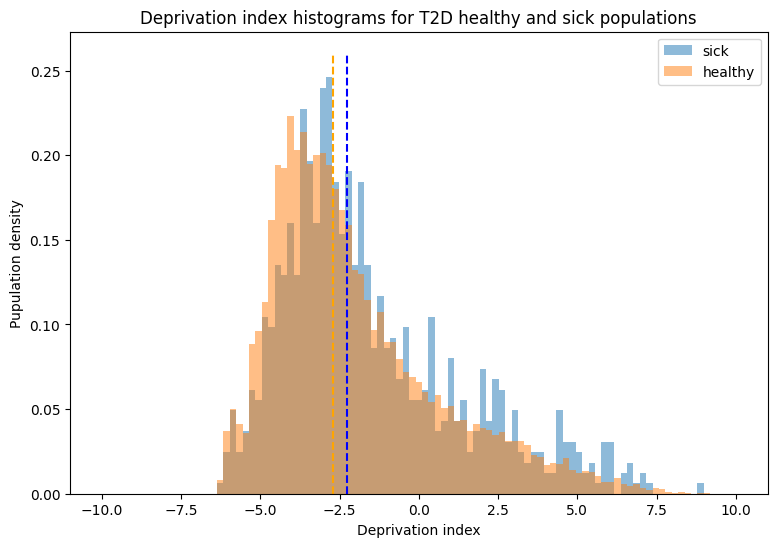

In [114]:
plt.style.use('default')
fig,ax=plt.subplots(1,1,figsize=(9,6))
ax.hist(tot_data_sick,bins,alpha=0.5,label="sick",density=True)
ax.hist(tot_data_healthy,bins,alpha=0.5,label="healthy",density=True)
ax.set_ylabel("Pupulation density")
ax.set_xlabel("Deprivation index")
ax.vlines(ymin=0,ymax=0.26,x=tot_data_sick.median(),color="blue",linestyles='dashed')
ax.vlines(ymin=0,ymax=0.26,x=tot_data_healthy.median(),color="orange",linestyles='dashed')
ax.set_title("Deprivation index histograms for T2D healthy and sick populations")
plt.legend(loc='upper right')
plt.savefig("/net/mraid08/export/jafar/Yochai/UKBB_Runs/For_article/Revision_runs/final_figures/S2A_Deprivation_index_compare.png")
plt.show()

No handles with labels found to put in legend.


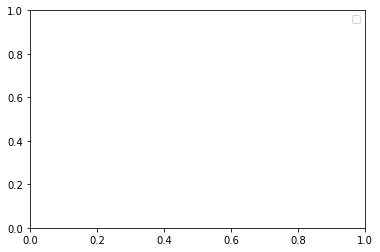